In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import time
import math
import pandas as pd

In [12]:
CROP_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/out/Crop_Output.png'

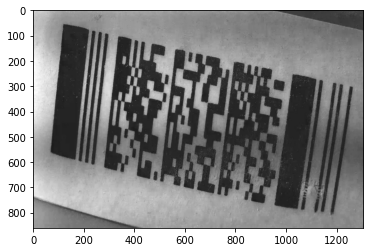

In [13]:
new_image = cv2.imread(CROP_PATH)
plt.imshow(new_image)

In [14]:
lsd = cv2.createLineSegmentDetector(0)
gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
start=time.time()
dll=lsd.detect(gray)
angless=[]
ccc=[]
if dll[0] is not None:
    for line in dll[0]:
        x0 = int(round(line[0][0]))
        y0 = int(round(line[0][1]))
        x1 = int(round(line[0][2]))
        y1 = int(round(line[0][3]))
        distance = math.sqrt( ((x1-x0)**2)+((y1-y0)**2) )
        ccc.append(distance)
        if distance>15:
            cv2.line(new_image, (x0, y0), (x1,y1), 255, 1, cv2.LINE_AA)
            cv2.circle(new_image,(x0,y0),5,(0, 0, 255),-1)
            cv2.circle(new_image,(x1,y1),5,(0, 0, 255),-1)
            angletan = round(math.degrees(math.atan2((round(line[0][3],2) - round(line[0][1],2)), (round(line[0][2],2) - round(line[0][0],2)))))
            angless.append(angletan)
print(time.time()-start)

 

angle_series = pd.Series(angless).value_counts()
angle_index = angle_series.index.tolist()
theta = -(90+angle_index[0])


0.07033252716064453


In [15]:
theta

-187

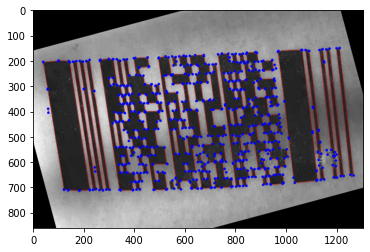

In [26]:
rows, cols, _ = new_image.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
dst = cv2.warpAffine(new_image,M,(cols,rows), flags=cv2.INTER_LINEAR)

plt.imshow(dst)